In [45]:
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt
# coords = np.array([[0,0], [1,0], [3,5], [10,20]])

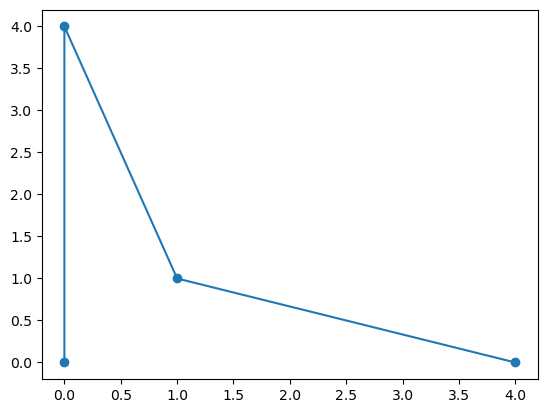

In [46]:
coords = 4 * np.array([[0,0],[0,1],[1/4,1/4],[1,0]])
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')


In [47]:
energy(coords)

(3.497080220971047,
 array([[  7.81521982,  -2.64570902],
        [  3.2691048 ,   0.51431034],
        [-11.04085146,   2.16334232],
        [ -0.04347317,  -0.03194364]]))

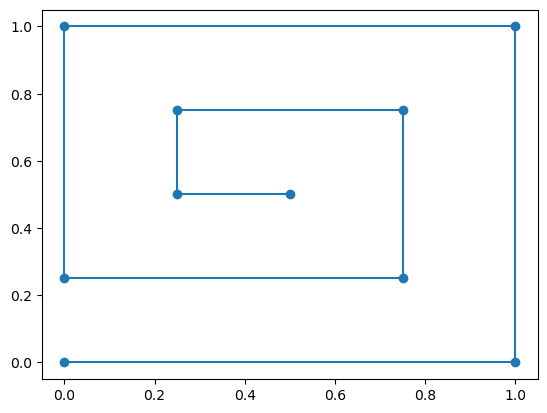

In [48]:
coords = np.array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.25],
       [0.75, 0.25],
       [0.75, 0.75],
       [0.25, 0.75],
       [0.25, 0.5 ],
       [0.5 , 0.5 ]])
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
# np.zeros(coords.shape)

In [49]:
len(coords)

10

In [50]:
len([np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))])

9

In [51]:
# converts coordinate configuration into angles configuration
def coords2angle(coords): 
    thetas = []
    lengths = []
    for ind in range(len(coords)-1):
        edge = coords[ind+1] - coords[ind]
        length = np.linalg.norm(edge)
        lengths.append(length)
        theta = np.arccos(edge[0] / length)
        if edge[1] < 0:
            theta = 2 * np.pi - theta
        thetas.append(theta)
    return np.array(thetas), np.array(lengths)

In [96]:
coords = np.array([[0,0], [10,-1]])
angles, lengths = coords2angle(coords)
print(angles)

[6.18351665]


In [52]:

# converts angles configuration back to coordinate configuration
import cmath
def angle2coords(angles, lengths):
    coords = [[0,0]]
    for ind in range(len(angles)):
        # Convert the complex number to a coord and offset it with the last coord
#         coord = [coords[ind][0] + np.real(coord), coords[ind][1] + np.imag(coord)]
        coord = [coords[ind][0] + lengths[ind] * np.cos(angles[ind]), 
                 coords[ind][1] + lengths[ind] * np.sin(angles[ind])]
        coords.append(coord)
    return np.array(coords)

In [53]:
# coords.size()

In [54]:
def gradient_term(wx, wy, vx, vy, ux, uy):
    g = np.array([
        [(-2*(-ux + wx)/sqrt((ux - wx)**2 + (uy - wy)**2) - 2*(-vx + wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3, 
         (-2*(-uy + wy)/sqrt((ux - wx)**2 + (uy - wy)**2) - 2*(-vy + wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3],
        [(2*(-ux + vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(vx - wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3, 
         (2*(-uy + vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(vy - wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3],
        [(2*(ux - vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(ux - wx)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3,
         (2*(uy - vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(uy - wy)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**3]
    ])
    return g

In [55]:
# computes `ENERGY` of a configuration and returns the gradient as well :)
def energy(coords):
    coords = np.array(coords)
    E = 0
    G = np.zeros(coords.shape)
    # Iterate through edges u,v
    for u_ind in range(len(coords)-1):
        u = coords[u_ind]
        v = coords[u_ind+1]
        edge = v - u
        # Iterate through vertices w not on the edge
        for w_ind in range(len(coords)):
            if w_ind==u_ind or w_ind==u_ind+1:
                continue
            w = coords[w_ind]
            # Add to the energy
            E+=1/(np.linalg.norm(u-w)+np.linalg.norm(v-w)-np.linalg.norm(u-v))**2
            # Add to the gradient
            g = gradient_term(w[0], w[1], v[0], v[1], u[0], u[1])
#             print(g)
            G[w_ind, :] = G[w_ind, :] + g[0]
            G[u_ind + 1, :] = G[u_ind + 1, :] + g[1]
            G[u_ind, :] = G[u_ind, :] + g[2]
    return E,G

In [83]:
def angle_gradient(coords):
    E, coordient = energy(coords)
    angles, lengths = coords2angle(coords)
#     print(lengths, angles)
    # The first angle shouldn't change, so don't keep track of it
    anglient = np.zeros(coords.shape[0] - 1)
    coordient = coordient.reshape(2 * coords.shape[0])
    # j is the angle we are updating
    for j in range(len(anglient)):
        # i are the angles before j
        for i in range(j):
#             print(i, j)
            anglient[j] = lengths[i] * (np.cos(angles[i]) - np.sin(angles[i]))
    return anglient, E, angles, lengths

0 5.65685424949238 3.497080220971047
10 5.749797602816326 2.0414199144534457
20 5.828278383908004 1.3590188658439477
30 5.892121152369908 0.986532969171576
40 5.941227661141543 0.7609624723288625
50 5.975547269846925 0.6139269763209795
60 5.995057409086985 0.5128444150241811
70 5.999751455635052 0.4406337329049985
80 5.989632383572383 0.38766250312248623
90 5.964711331130489 0.3481903819545042
100 5.925010873139409 0.3186607103579067
110 5.8705734068801005 0.2968254991510864
120 5.801475732998906 0.28127808027300005
130 5.717851736887386 0.27120250729804457
140 5.619926157155319 0.26625152853656825
e increased at 146: 0.2657591104578163 > 0.2657080310691529
e increased at 147: 0.2658646978737182 > 0.2657080310691529
e increased at 148: 0.26602543496885256 > 0.2657080310691529
e increased at 149: 0.2662420193701191 > 0.2657080310691529
e increased at 150: 0.2665152063421262 > 0.2657080310691529
150 5.508063888476938 0.2665152063421262
e increased at 151: 0.2668458105660831 > 0.265708031

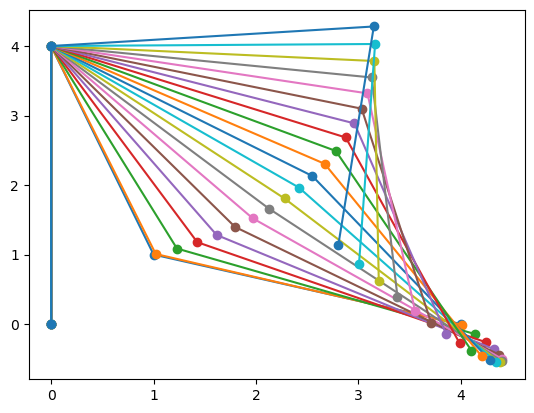

In [98]:
def gradient_descent(coords, stepsize = 0.01):
    gradient, E, angles, lengths = angle_gradient(coords)
    new_angles = angles - stepsize * gradient / np.linalg.norm(gradient)
    coords = angle2coords(new_angles, lengths)
    return coords, new_angles, lengths, gradient, E

coords = 4 * np.array([[0,0],[0,1],[1/4,1/4],[1,0]])
# coords = np.array([[0.  , 0.  ],
#        [1.  , 0.  ],
#        [1.  , 1.  ],
#        [0.  , 1.  ],
#        [0.  , 0.25],
#        [0.75, 0.25],
#        [0.75, 0.75],
#        [0.25, 0.75],
#        [0.25, 0.5 ],
#        [0.5 , 0.5 ]])
# coords = np.array([[0,0], [1,0], [1,1]])
correct_lens = [np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))]

plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

i = 0
prev_energy = 999999
while i<200:
    tolerance = 0.01
#     print(i)
    coords, angles, lengths, gradient, ener = gradient_descent(coords, stepsize=0.01)
    if i>5 and ener - prev_energy > 1e-5:
        print(f'e increased at {i}: {ener} > {prev_energy}')
#         break
    else:
        prev_energy = ener
    if i % 10 == 0:
        plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
        print(f"{i} {np.linalg.norm(gradient)}", end=" ")
        print(ener)
    i += 1
    if np.linalg.norm(gradient) < tolerance:
        break

0 14.339189641259274 3.497080220971047
100 13.675456368573498 3.3855415307424517
200 13.051484039402181 3.2793517587642094
300 12.464392236817067 3.1781815820940227
400 11.9115432836459 3.0817260482935316
500 11.390519054183768 2.989702489186796
600 10.899100250850266 2.9018486361501448
700 10.435247858228152 2.817920915346663
800 9.997086523324016 2.737692903845804
900 9.582889642376523 2.6609539297829117
1000 9.191065961744675 2.5875078016434334
1100 8.820147523976855 2.5171716534454376
1200 8.468778810670495 2.4497748940845336
1300 8.135706951491624 2.3851582504011604
1400 7.819772884255039 2.3231728946829064
1500 7.519903364453814 2.2636796483186084
1600 7.235103734456465 2.206548254216413
1700 6.964451372898882 2.151656711381093
1800 6.70708975385422 2.098890665743821
1900 6.462223053291172 2.048142851951985
2000 6.229111247312147 1.9993125813753954
2100 6.007065652783474 1.9523052720679002
2200 5.795444866373822 1.9070320168554622
2300 5.5936510627850256 1.863409186106388
2400 5.

19600 0.24554580483806812 0.29023897064226534
19700 0.2432840191969607 0.2888214720329115
19800 0.24105670792609324 0.28742101772653406
19900 0.23886321701119265 0.2860373570661712
20000 0.23670290747707073 0.28467024420256515
20100 0.23457515498541132 0.28331943798312154
20200 0.23247934944487206 0.2819847018438981
20300 0.23041489463294904 0.2806658037044428
20400 0.2283812078292963 0.2793625158654543
20500 0.2263777194600953 0.2780746149091693
20600 0.22440387275307694 0.27680188160237396
20700 0.22245912340285295 0.27554410080197267
20800 0.22054293924622606 0.27430106136304727
20900 0.2186547999471153 0.27307255604930714
21000 0.21679419669079536 0.27185838144587704
21100 0.2149606318871675 0.27065833787436366
21200 0.21315361888269493 0.26947222931009474
21300 0.21137268168078388 0.2682998633015017
21400 0.20961735467030163 0.26714105089156964
21500 0.20788718236197656 0.2659956065412955
21600 0.2061817191324163 0.2648633480550923
21700 0.2045005289755079 0.26374409650809133
2180

38300 0.08959417247723554 0.1801114015364288
38400 0.08937356904863049 0.1799578183413012
38500 0.08915559995656704 0.17980661288760946
38600 0.08894023961747782 0.17965776582193904
38700 0.0887274627646527 0.17951125795201772
38800 0.08851724444296814 0.17936707024436194
38900 0.08830956000371264 0.17922518382196678
39000 0.08810438509950927 0.17908557996204383
39100 0.08790169567932292 0.17894824009379473
39200 0.08770146798356271 0.17881314579623064
39300 0.08750367853926334 0.1786802787960249
39400 0.0873083041553608 0.17854962096541316
39500 0.08711532191804747 0.17842115432012803
39600 0.08692470918620995 0.1782948610173725
39700 0.08673644358694878 0.17817072335383147
39800 0.08655050301117873 0.17804872376372255
39900 0.08636686560930577 0.17792884481688068
40000 0.08618550978698038 0.17781106921688006
40100 0.08600641420093057 0.17769537979919414
40200 0.08582955775486088 0.1775817595293846
40300 0.08565491959543081 0.1774701915013302
40400 0.08548247910830276 0.17736065893548

KeyboardInterrupt: 

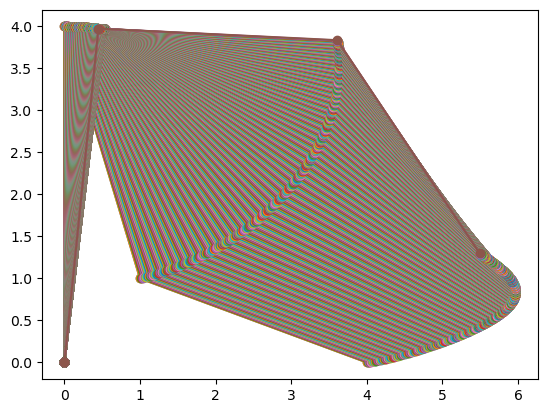

In [73]:
def gradient_descent(coords, stepsize = 0.01):
    ener, gradient = energy(coords)
    new_coords = coords - stepsize * gradient / np.linalg.norm(gradient)
    return new_coords, ener, gradient

coords = 4 * np.array([[0,0],[0,1],[1/4,1/4],[1,0]])
# coords = np.array([[0.  , 0.  ],
#        [1.  , 0.  ],
#        [1.  , 1.  ],
#        [0.  , 1.  ],
#        [0.  , 0.25],
#        [0.75, 0.25],
#        [0.75, 0.75],
#        [0.25, 0.75],
#        [0.25, 0.5 ],
#        [0.5 , 0.5 ]])
# coords = np.array([[0,0], [1,0], [1,1]])
correct_lens = [np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))]

plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

i = 0
prev_energy = 999999
while i<100000:
    tolerance = 0.01
#     print(i)
    coords, ener, gradient = gradient_descent(coords, stepsize=0.0001)
    if i>5 and ener - prev_energy > 1e-5:
        print(f'e increased: {ener} > {prev_energy}')
#         break
    else:
        prev_energy = ener
    angs, lens = coords2angle(coords)
    coords = angle2coords(angs, correct_lens)
    if i % 100 == 0:
        plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
        print(f"{i} {np.linalg.norm(gradient)}", end=" ")
        print(ener)
    i += 1
    if np.linalg.norm(gradient) < tolerance:
        break

10853.804825009993
4.0


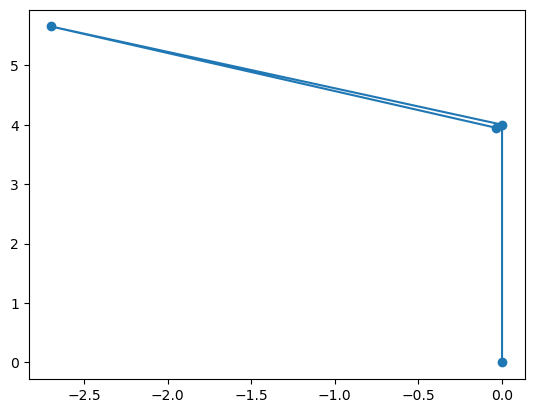

In [88]:
print(np.linalg.norm(energy(coords)[0]))
print(np.linalg.norm(coords[0] - coords[1]))
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

In [12]:
energy(coords)[1]

array([[  7.62650569,  -2.58478975],
       [  3.19937776,   0.50472101],
       [-10.78261502,   2.11134974],
       [ -0.04326843,  -0.031281  ]])

In [13]:
if 3:
    print("hi")

hi


In [14]:
coords2angle(coords)

(array([1.57040039, 5.03557881, 5.96128076]),
 array([4.        , 3.16227766, 3.16227766]))

[[0.00000000e+00 0.00000000e+00]
 [1.58373282e-03 3.99999969e+00]
 [1.00590051e+00 1.00144206e+00]
 [4.00574648e+00 9.80102183e-04]]
[[0.00000000e+00 0.00000000e+00]
 [1.58373282e-03 3.99999969e+00]
 [1.00590051e+00 1.00144206e+00]
 [4.00574648e+00 9.80102183e-04]]
[1.57040039 5.03557881 5.96128076]
[1.57040039 5.03557881 5.96128076]
[[0.00000000e+00 0.00000000e+00]
 [1.58373282e-03 3.99999969e+00]
 [1.00590051e+00 1.00144206e+00]
 [4.00574648e+00 9.80102183e-04]] 5.013230720652105


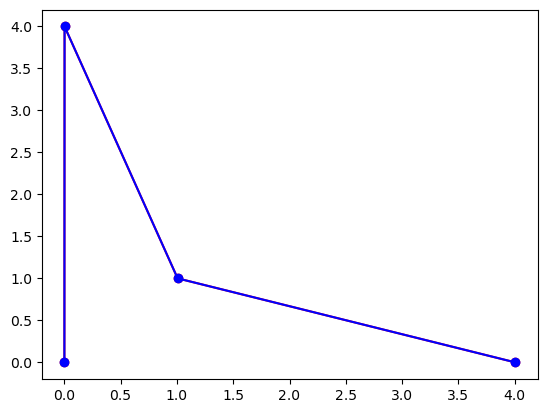

In [15]:
print(coords)
for i in range(coords.shape[0]):
    coords[i] -= coords[0]
print(coords)
angles, lengths = coords2angle(coords)
print(angles)
new_coords = angle2coords(angles, lengths)
new_angles, _ = coords2angle(new_coords)
print(new_angles)
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], 'r-o')
plt.plot([i[0] for i in new_coords[:]],[i[1] for i in new_coords[:]], 'b-o')
print(new_coords, np.linalg.norm(new_coords, 1))

In [16]:
from sympy import *
from sympy.vector import gradient
init_printing()

In [18]:
wx, wy, vx, vy, ux, uy = symbols('wx wy vx vy ux uy ', real = True)
w = Matrix([wx, wy])
v = Matrix([vx, vy])
u = Matrix([ux, uy])
expr = ((u-v).norm(2) + (u-w).norm(2) - (v-w).norm(2))**2
exp = 1/expr
# gradient(exp)
l = [ux, uy, vx, vy, wx, wy ]
for var in l:
    print(diff(exp,var))

(-2*(ux - vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(ux - wx)/sqrt((ux - wx)**2 + (uy - wy)**2))/(sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) - sqrt((vx - wx)**2 + (vy - wy)**2))**3
(-2*(uy - vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - 2*(uy - wy)/sqrt((ux - wx)**2 + (uy - wy)**2))/(sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) - sqrt((vx - wx)**2 + (vy - wy)**2))**3
(-2*(-ux + vx)/sqrt((ux - vx)**2 + (uy - vy)**2) + 2*(vx - wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) - sqrt((vx - wx)**2 + (vy - wy)**2))**3
(-2*(-uy + vy)/sqrt((ux - vx)**2 + (uy - vy)**2) + 2*(vy - wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) - sqrt((vx - wx)**2 + (vy - wy)**2))**3
(-2*(-ux + wx)/sqrt((ux - wx)**2 + (uy - wy)**2) + 2*(-vx + wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)*